# Proyecto 4: Clasificación de señales ECG

### David Alejandro Henao - Maria Camila Bravo

### 1. Revisión teórica. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

### Hacer un resumen de la sección extracción de caracteríticas (Features extraction) y discutir desde el artículo u otras referencias como se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad (10%)

Los métodos tradicionales, como las redes neuronales y las transformadas de Fourier o wavelets, aunque útiles, enfrentan limitaciones al intentar preservar la información temporal esencial y son poco interpretables. Estos enfoques resultan ineficaces para realizar clasificaciones precisas en patologías como la fibrilación auricular (AFIB), donde se presentan distorsiones o la ausencia de ondas clave en el ECG, como la onda P. En vista de que la demanda de diagnósticos automáticos de alta precisión para afecciones cardíacas ,la política de salud pública de implementar procedimientos de cribado más amplios y la adopción de dispositivos portátiles habilitados para ECG ha aumentado, el estudio presenta un nuevo método de extracción de características de ECG. Este método, al igual que otros, deben tener en cuenta la variabilidad interpersonal e intrapersonal de las señales ECG, la distorsión por ruido y la ausencia de ondas o segmentos en muchos casos de arritmia.

Este nuevo método para la extracción de características en señales ECG se enfoca en analizar cómo se distribuyen y se relacionan ciertos atributos de las ondas en una señal de ECG, en términos tanto de su forma (morfología) como de su comportamiento en el tiempo Este enfoque permite capturar patrones específicos que no dependen únicamente de la presencia de ondas tradicionales, como la onda P, lo cual es crucial cuando estas ondas están ausentes o distorsionadas, como en el caso de la fibrilación auricular. Además, el proceso de normalización de las señales, junto con la incorporación de factores demográficos como edad y género, permite mejorar la comparabilidad de las señales entre individuos y reducir la variabilidad intrapersonal e interpersonal. Esto aumenta la precisión y robustez del análisis, especialmente en la clasificación de arritmias con señales afectadas por distorsiones o la falta de ondas clave. La integración con algoritmos avanzados como Gradient Boosting Trees mejora aún más la capacidad de clasificación, permitiendo obtener resultados altamente precisos que son comparables a los obtenidos por cardiólogos, incluso en casos complicados de arritmias.

### **Discusión sobre la ausencia de ondas en el complejo PQRS:**

Cuando desaparecen ciertas ondas del complejo PQRS en el ECG debido a enfermedades, el análisis de la señal se enfrenta a una pérdida de información crucial que complica la interpretación y clasificación de las arritmias. Las estrategias para abordar este desafío se basan en la extracción de características alternativas y métodos analíticos que aprovechan la información restante en la señal. A continuación, se amplían los enfoques previamente descritos:

ESTRATEGIAS DE MANEJO:

* Análisis de intervalos RR: Los intervalos RR se calculan como el tiempo entre picos R consecutivos, proporcionando información sobre el ritmo cardíaco y su regularidad. En arritmias como la fibrilación auricular (AFIB), donde las ondas P están ausentes o reemplazadas por ondas de fibrilación, la irregularidad de los intervalos RR es un indicador clave. Este método permite caracterizar ritmos rápidos, lentos e irregulares sin depender de las ondas ausentes.

* Transformada de Fourier y Wavelet: Estas herramientas analizan la señal en el dominio de la frecuencia, ayudando a identificar patrones anómalos asociados con arritmias. La Transformada Wavelet, en particular, permite retener parte de la información temporal, útil para identificar alteraciones en la dinámica de la señal.

* Modelos de Machine Learning: Algoritmos de aprendizaje automático pueden manejar datos incompletos ajustándose dinámicamente a la ausencia de componentes. El uso de características derivadas, como las relaciones entre amplitudes y tiempos de los picos restantes, puede aumentar la precisión del modelo.

* Morfología, duración y patrón del complejo QRS: El análisis del QRS es fundamental cuando las ondas P o T no son detectables. Las duraciones prolongadas del QRS pueden señalar bloqueos de rama derecha o izquierda, mientras que cambios en su morfología pueden indicar arritmias ventriculares [1]. Este enfoque es efectivo porque el QRS se mantiene presente en la mayoría de los ECG incluso en condiciones severas[2].


Extracción de los datos

In [1]:
import pandas as pd
ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto3\\Diagnostics.xlsx"
#ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"

dataframe = pd.read_excel(ruta)
df_filtrado= dataframe[(dataframe['Rhythm'] == 'SB') | (dataframe['Rhythm'] == 'AFIB')]
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado = df_filtrado[['FileName','Rhythm']]
df_filtrado.head()

FileName Rhythm
0  MUSE_20180113_171327_27000   AFIB
1  MUSE_20180112_073319_29000     SB
2  MUSE_20180113_121940_44000     SB
3  MUSE_20180112_120347_79000     SB
4  MUSE_20180114_075026_69000   AFIB

In [2]:
# Función para la extracción de los datos
def obtener_nombres_archivos_por_ritmo(ruta_excel, ritmos_AFIB=['AFIB'], ritmos_SB=['SB']):
    dataframe = pd.read_excel(ruta_excel)
    # Filtrar por los ritmos deseados y extraer los nombres de archivo
    nombres_AFIB = dataframe[dataframe['Rhythm'].isin(ritmos_AFIB)]['FileName'].tolist()
    nombres_SB = dataframe[dataframe['Rhythm'].isin(ritmos_SB)]['FileName'].tolist()
    return nombres_AFIB, nombres_SB

def leer_archivos_ecg(nombres_AFIB, nombres_SB, ruta_carpeta):
    datos_AFIB = {}
    datos_SB = {}
    
    for nombre_archivo in nombres_AFIB + nombres_SB:
        ruta_archivo = os.path.join(ruta_carpeta, f"{nombre_archivo}.csv")
        
        # Verificar si el archivo existe
        if os.path.exists(ruta_archivo):
            df = pd.read_csv(ruta_archivo, delimiter=',', skiprows=1, names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
            # Guardar los datos de la columna 'II'
            if nombre_archivo in nombres_AFIB:
                datos_AFIB[nombre_archivo] = df['II'].values
            else:
                datos_SB[nombre_archivo] = df['II'].values
        else:
            print(f"Archivo {ruta_archivo} no encontrado.")
    
    return datos_AFIB, datos_SB

### 2. Selección de base de datos.

#### EXTRACCIÓN DE REGISTROS

### 3. Herramientas computacionales. Hacer un minitutorial del uso de la herramienta NeuroKit (https://neuropsychology.github.io/NeuroKit/index.html) orientado al análisis de señales ECG (10%)

### **PASO1**
INSTALACIÓN:Para usar usar la herramienta es necesario instalar la libreria neurokit2. Para ello usamos la siguiente linea de código:

In [3]:
!pip install neurokit2

### **PASO2**
Una vez instalada la libreria importamos las demás librerias necesarias para su correecto uso:

In [4]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

### **PASO3**
Ahora que tenemos las librerias que necesitamos podemos cargar una señal ECG con la que hayamos trabajado. Tambien es necesario hacer una limpieza a la señal para reducir ruido.

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\User\AppData\Local\Temp\ipykernel_22288\101929950.py:2: SyntaxWarning: invalid escape sequence '\M'
  ecg_signal = pd.read_csv("Señales_Seleccionadas\MUSE_20180112_122550_52000_derivacion_II.csv")


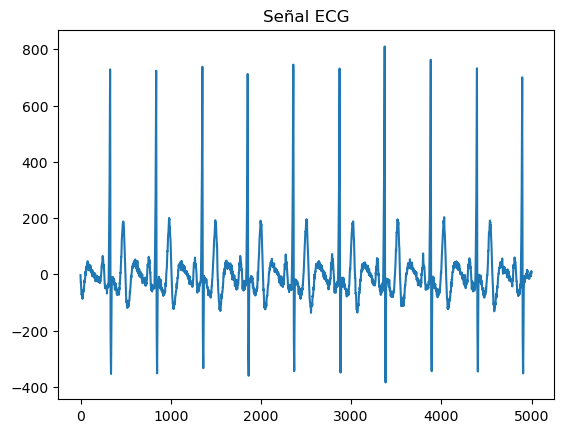

In [5]:
# Cargamos la señal  MUSE_20180112_134549_62000
ecg_signal = pd.read_csv("Señales_Seleccionadas\MUSE_20180112_122550_52000_derivacion_II.csv")
ecg_signal=ecg_signal.values.flatten()
ecg_limpia = nk.ecg_clean(ecg_signal, sampling_rate=100)
plt.plot(ecg_limpia)
plt.title("Señal ECG")
plt.show()

Neurokit tambien permite generar señales sintéticas o exportarlas desde la misma libreria. Por ejemplo con las siguientes lineas de código permite exportar datos de ekg en reposo que pueden usar usados para análisis. Igualmente essto es meramente informativo, trabajaremos con una señal de ejemplo extraida de la base de datos dada

In [6]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows
#plt.plot(data[1])

ECG       PPG       RSP
0  0.003766 -0.102539  0.494652
1 -0.017466 -0.103760  0.502483
2 -0.015679 -0.107422  0.511102
3 -0.001598 -0.110855  0.518791
4  0.002483 -0.112610  0.528669

### **PASO4**
Dentro del NeuroKit hay diferentes funciones para procesar las señales ECG y extraer características importantes de ellas, en los ejemplos mostrados vemos que permite: Análisis de la variabilidad de frecuencia cardíaca VFC, extracción y visualización de latidos individuales del corazón, localiazación de las ondas P,Q,S y T en el EKG, etc.  Se suele hacer un procesamiento básico que incluye detección de los picos P,Q,R y demás,  y la extracción de intervalos RR, el cual realizaremos en este minitutorial.

### **4.1 Picos R**

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_R_Peaks_Uncorrected': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.50766667, 0.511     , 0.512     , 0.502     , 0.507     ,
       0.512     , 0.5       , 0.511     , 0.512     , 0.502     ]), 'ECG_fixpeaks_drrs': array([-0.02877211,  0.15232292,  0.04569688, -0.45696877,  0.22848439,
        0.22848439, -0.54836253,  0.50266565,  0.04569688, -0.45696877]), 'ECG_fixpeaks_mrrs': array([-0.14378145,  0.14378145,  0.11502516, -0.77641984, -0.20129403,
        0.11502516, -0.94895758,  0.08626887,  0.21567218, -0.6038821 ]), 'ECG_fixpeaks_s12': array([0.15232292, 0.04569688, 0.15232292, 0.04569688, 0.22848439,
       0.22848439, 0.22848439, 0.04569688, 0

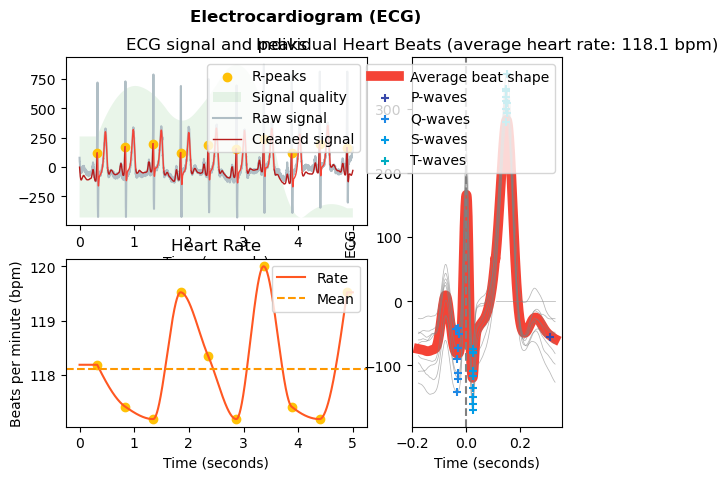

In [7]:
# Procesar la señal ECG
ecg_final, info = nk.ecg_process(ecg_signal)
nk.ecg_plot(ecg_final)
print(info)

### **4.2 Detección de los picos P,Q,S y T**

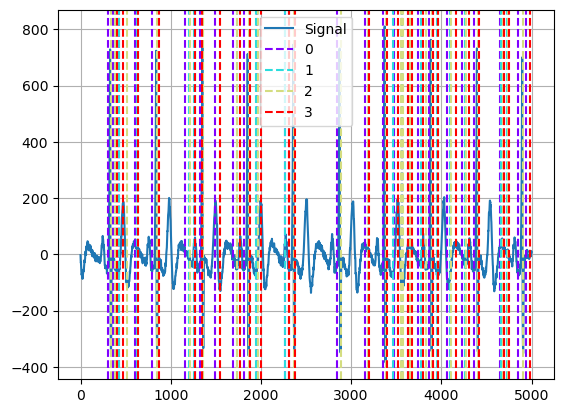

In [8]:
_, rpeaks = nk.ecg_peaks(ecg_limpia, sampling_rate=100)
signals, waves = nk.ecg_delineate(ecg_limpia, rpeaks, sampling_rate=100)
nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"],waves["ECG_S_Peaks"],waves["ECG_T_Peaks"]], ecg_limpia)
plt.grid()

### **4.3 Variabilidad de la frecuencia cardíaca (VFC)**

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 328,  384,  451,  630,  839, 1213, 1292, 1351, 1513, 1735, 1853,
       1966, 2275, 2359, 2772, 3185, 3372, 3497, 3578, 3652, 3776, 3883,
       3956, 4110, 4267, 4395, 4675, 4736, 4897, 4954]), 'ECG_R_Peaks_Uncorrected': array([ 328,  384,  451,  630,  839, 1213, 1292, 1351, 1513, 1735, 1853,
       1966, 2275, 2359, 2872, 3185, 3372, 3497, 3578, 3652, 3776, 3883,
       3956, 4110, 4267, 4395, 4675, 4736, 4897, 4954]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.59517241, 0.56      , 0.67      , 1.79      , 2.09      ,
       3.74      , 0.79      , 0.59      , 1.62      , 2.22      ,
       1.18      , 1.13      , 3.09      , 0.84      , 4.13      ,
       4.13      , 1.87      , 1.25      , 0.81      , 0.74      ,
       1.24      , 1.07      , 0.73      , 1.54      , 1.57      

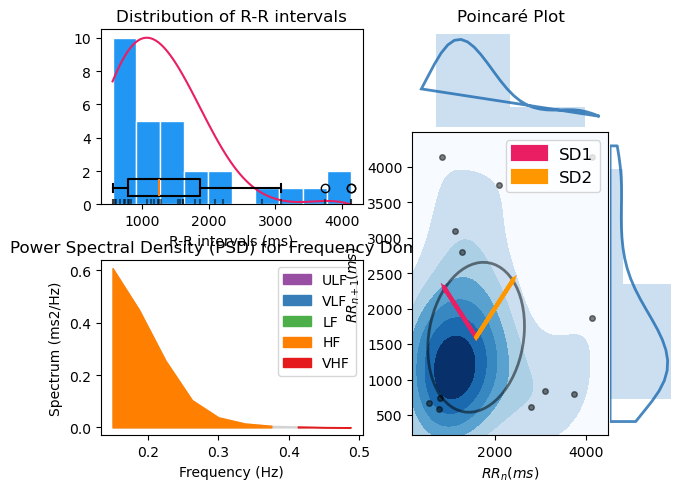

In [9]:
peaks, info = nk.ecg_peaks(ecg_limpia, sampling_rate=100, correct_artifacts=True)
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
print(info)

El Poincaré plot es una representación gráfica que sirve para analizar la variabilidad de la frecuencia cardíaca (HRV) desde una perspectiva no lineal. Es especialmente útil para evaluar la dinámica de los intervalos RR y obtener métricas adicionales relacionadas con la dispersión de los datos.

Interpretación del Poincaré Plot:
1) **Ejes del gráfico:**

* Eje x: RR_n que representa el intervalo RR actual 
* Eje y: RR_n+1, que representa el intervalo RR siguiente

Cada punto en el gráfico corresponde a un par de intervalos consecutivos 

2) **Distribución de los puntos:**

* Agrupación de puntos cercanos a la diagonal: Indica regularidad o consistencia en los intervalos RR, lo que refleja una actividad cardíaca estable.
* Dispersión de los puntos: Una mayor dispersión refleja mayor variabilidad de los intervalos RR, lo que puede estar asociado con una mejor regulación autonómica del corazón.

3) **Elipses y parámetros SD1/SD2:**

* SD1 (desviación estándar perpendicular a la diagonal): Representa la variabilidad a corto plazo de los intervalos RR. Asociada con la actividad parasimpática.
* SD2 (desviación estándar a lo largo de la diagonal): Representa la variabilidad a largo plazo de los intervalos RR. Asociada con la actividad simpática y parasimpática combinadas.
* Relación SD1/SD2: Da una idea de la predominancia relativa de las actividades simpática y parasimpática.

### **4.4 Valor del HRV**

In [10]:
nk.hrv(signals, sampling_rate=100)

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


HRV_MeanNN     HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  1598.62069  1105.604954         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5    HRV_RMSSD     HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  1517.990918  1545.759646  ...    1.504077   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    4.789015     1.391831       0.0        0.0         0.0  1.630085   

    HRV_HFD   HRV_KFD   HRV_LZC  
0  1.953846  2.250455  1.507649  

[1 rows x 82 columns]

### Razones comunes para los NaN:

* Falta de picos R o datos insuficientes
* Problemas con los picos --> Mucho Ruido o mucha linealidad.
* Falta de variabilidad significativa
* Tamaño de la ventana:


### **4. Escoger diferentes señales de la base de datos del punto 2 y aplicar el tutorial del punto 3 (5%).**

Para este numeral hemos decidido usar las 10 señales que usabamos en el proyecto 3 para aplicar los diferentes flujos. Estas señales estarán adjuntas en el github y están guardadas en la carpeta Señales_Seleccionadas.

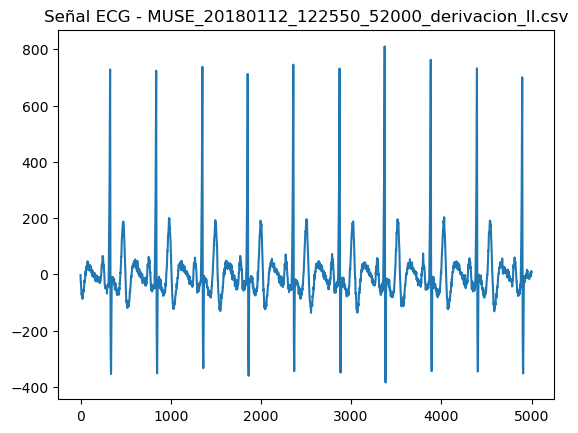

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


Información del procesamiento para MUSE_20180112_122550_52000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_R_Peaks_Uncorrected': array([ 323,  834, 1346, 1848, 2355, 2867, 3367, 3878, 4390, 4892]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.50766667, 0.511     , 0.512     , 0.502     , 0.507     ,
       0.512     , 0.5       , 0.511     , 0.512     , 0.502     ]), 'ECG_fixpeaks_drrs': array([-0.02877211,  0.15232292,  0.04569688, -0.45696877,  0.22848439,
        0.22848439, -0.54836253,  0.50266565,  0.04569688, -0.45696877]), 'ECG_fixpeaks_mrrs': array([-0.14378145,  0.14378145,  0.11502516, -0.77641984, -0.20129403,
        0.11502516, -0.94895758,  0.08626887,  0.21567218, -0.6038821 ]), 'ECG_fixpeaks_s12': array([0.15232292, 0.04569688,

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Información de picos para MUSE_20180112_122550_52000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 328,  384,  451,  630,  839, 1213, 1292, 1351, 1513, 1735, 1853,
       1966, 2275, 2359, 2772, 3185, 3372, 3497, 3578, 3652, 3776, 3883,
       3956, 4110, 4267, 4395, 4675, 4736, 4897, 4954]), 'ECG_R_Peaks_Uncorrected': array([ 328,  384,  451,  630,  839, 1213, 1292, 1351, 1513, 1735, 1853,
       1966, 2275, 2359, 2872, 3185, 3372, 3497, 3578, 3652, 3776, 3883,
       3956, 4110, 4267, 4395, 4675, 4736, 4897, 4954]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.59517241, 0.56      , 0.67      , 1.79      , 2.09      ,
       3.74      , 0.79      , 0.59      , 1.62      , 2.22      ,
       1.18      , 1.13      , 3.09      , 0.84      , 4.13      ,
       4.13      , 1.87      , 1.25      , 0.81      , 0.74 

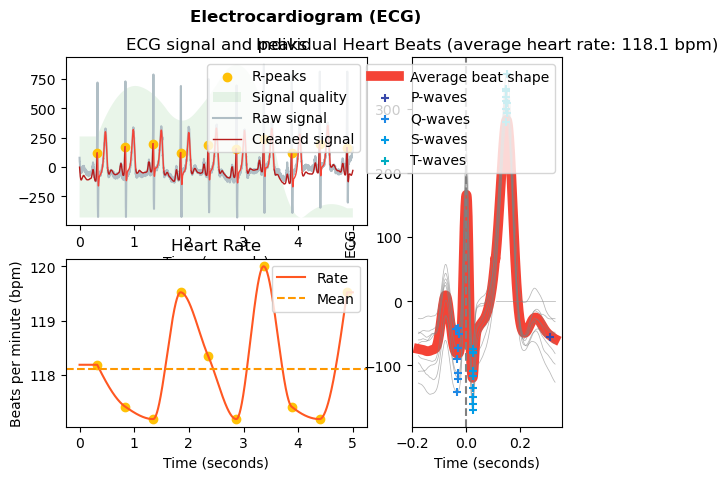

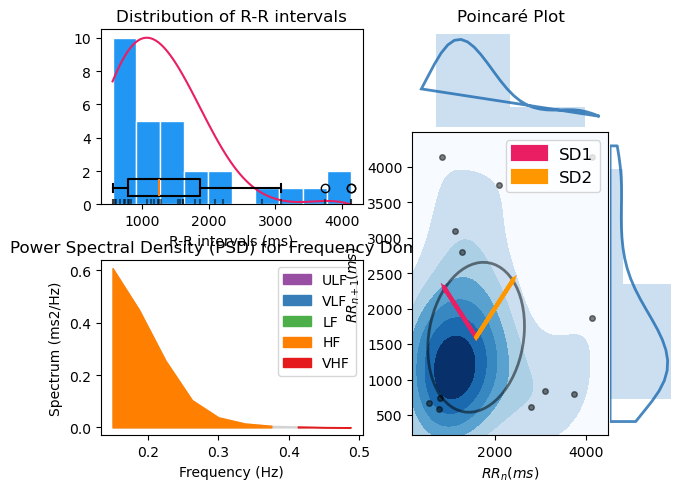

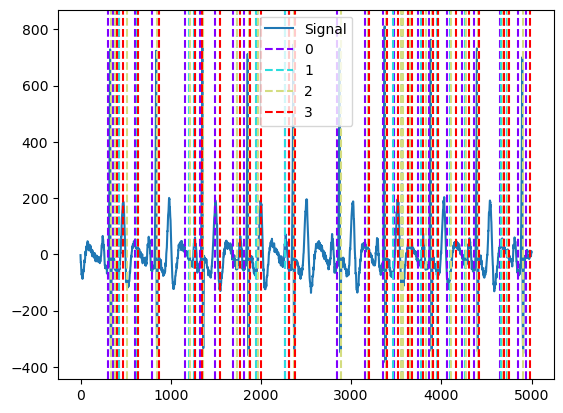

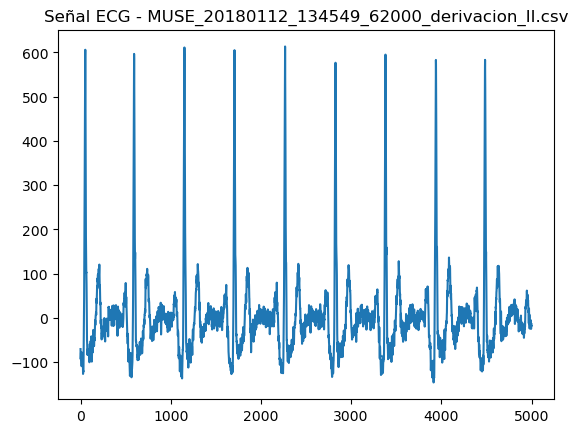

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


Información del procesamiento para MUSE_20180112_134549_62000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 595, 1152, 1708, 2268, 2827, 3382, 3941, 4485]), 'ECG_R_Peaks_Uncorrected': array([ 595, 1152, 1708, 2268, 2827, 3382, 3941, 4485]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.55571429, 0.557     , 0.556     , 0.56      , 0.559     ,
       0.555     , 0.559     , 0.544     ]), 'ECG_fixpeaks_drrs': array([-0.231051  ,  0.17751479, -0.13806706,  0.55226824, -0.13806706,
       -0.55226824,  0.55226824, -2.07100592]), 'ECG_fixpeaks_mrrs': array([-0.3562753 ,  0.        , -0.22672065,  0.79352227,  0.56680162,
       -0.68016194,  0.4534413 , -6.12145749]), 'ECG_fixpeaks_s12': array([ 0.17751479, -0.13806706,  0.17751479, -0.13806706, -0.55226824,
       -0.13806706, -0.55226824,  0.55226824]), 'ECG_fixpe

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)


Información de picos para MUSE_20180112_134549_62000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([  53,  120,  264,  367,  415,  594,  722,  889,  964, 1152, 1417,
       1624, 1707, 1926, 2145, 2268, 2545, 2827, 3060, 3381, 3609, 3940,
       4150, 4485, 4662, 4718, 4972]), 'ECG_R_Peaks_Uncorrected': array([  53,  120,  264,  367,  415,  594,  722,  889,  964, 1152, 1417,
       1624, 1707, 2031, 2145, 2176, 2268, 2545, 2827, 3060, 3381, 3609,
       3940, 4036, 4150, 4485, 4662, 4718, 4972]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.89192308, 0.67      , 1.44      , 1.03      , 0.48      ,
       1.79      , 1.28      , 1.67      , 0.75      , 1.88      ,
       2.65      , 2.07      , 0.83      , 2.19      , 2.19      ,
       1.23      , 2.77      , 2.82      , 2.33      , 3.21      ,
       2.28      

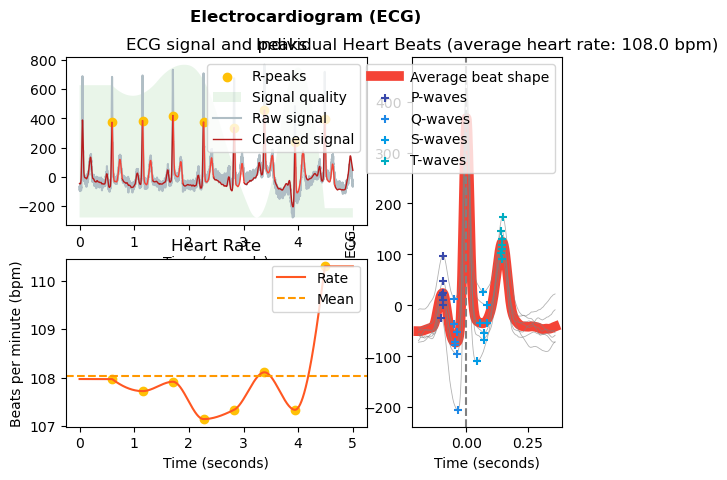

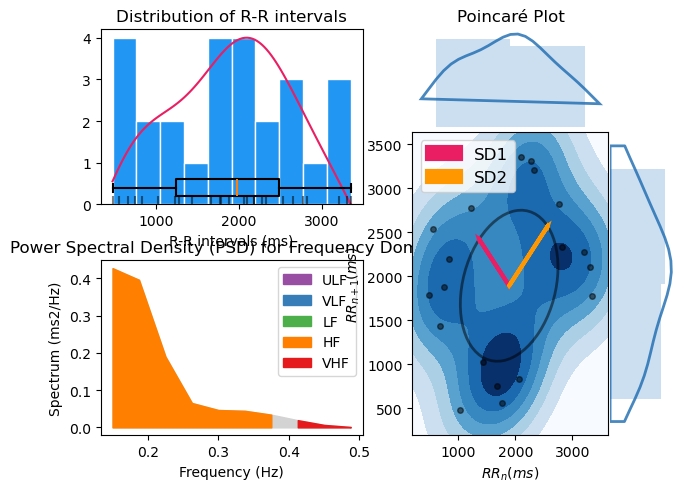

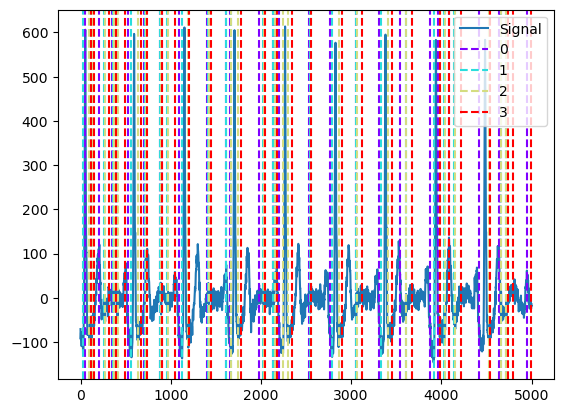

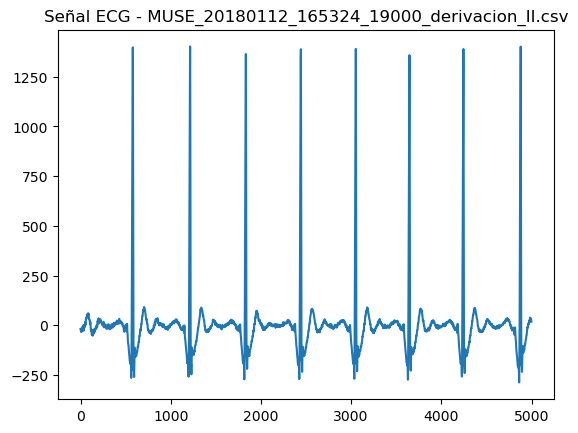

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


Información del procesamiento para MUSE_20180112_165324_19000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 578, 1213, 1831, 2441, 3050, 3645, 4243, 4878]), 'ECG_R_Peaks_Uncorrected': array([ 578, 1213, 1831, 2441, 3050, 3645, 4243, 4878]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.61428571, 0.635     , 0.618     , 0.61      , 0.609     ,
       0.595     , 0.598     , 0.635     ]), 'ECG_fixpeaks_drrs': array([ 0.07618747,  0.53331232, -0.4376839 , -0.20596889, -0.02574611,
       -0.36044557,  0.07723834,  0.95260614]), 'ECG_fixpeaks_mrrs': array([ 0.04191993,  0.48906588,  0.11458115, -0.08383987, -0.12296514,
       -0.67071893, -0.46950325,  0.4988472 ]), 'ECG_fixpeaks_s12': array([ 0.53331232,  0.07618747, -0.20596889, -0.4376839 , -0.36044557,
       -0.02574611,  0.95260614,  0.07723834]), 'ECG_fixpe

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Información de picos para MUSE_20180112_165324_19000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 108,  200,  255,  516,  580,  897, 1361, 1570, 1769, 1833, 2105,
       2378, 2443, 2776, 2987, 3052, 3297, 3375, 3583, 3647, 3952, 4042,
       4181, 4245, 4639, 4817, 4880]), 'ECG_R_Peaks_Uncorrected': array([ 108,  200,  255,  516,  580, 1152, 1215, 1570, 1769, 1833, 2247,
       2378, 2443, 2776, 2987, 3052, 3297, 3375, 3583, 3647, 3952, 4042,
       4181, 4245, 4639, 4817, 4880]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.83538462, 0.92      , 0.55      , 2.61      , 0.64      ,
       3.17      , 4.64      , 2.09      , 1.99      , 0.64      ,
       2.72      , 2.73      , 0.65      , 3.33      , 2.11      ,
       0.65      , 2.45      , 0.78      , 2.08      , 0.64      ,
       3.05      , 0.9       

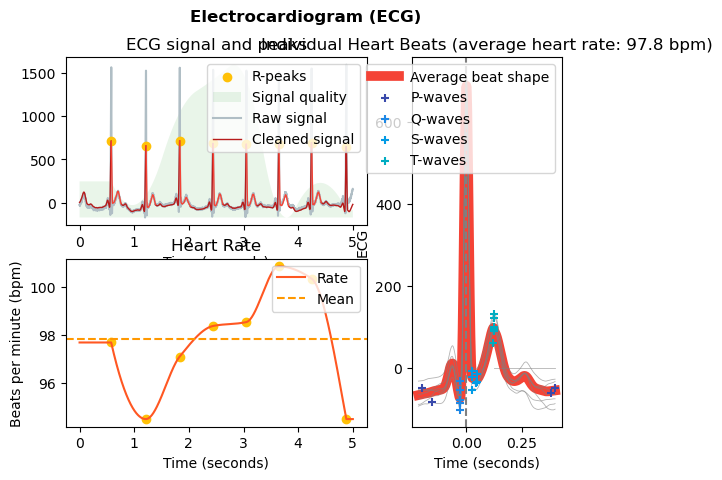

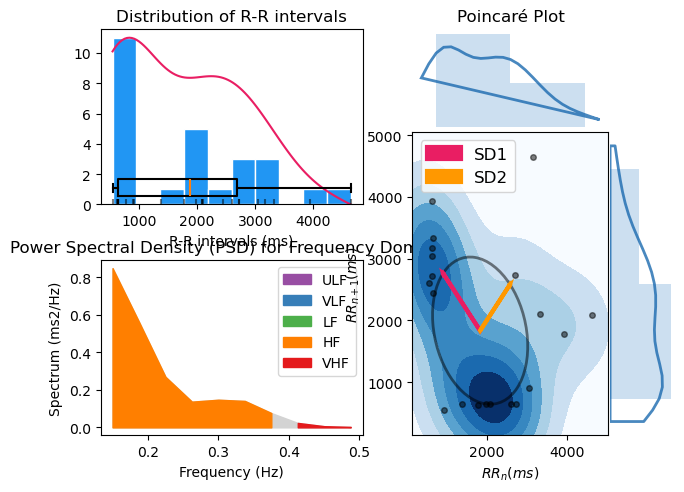

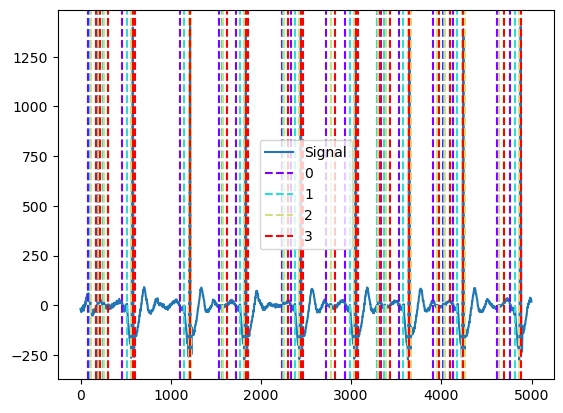

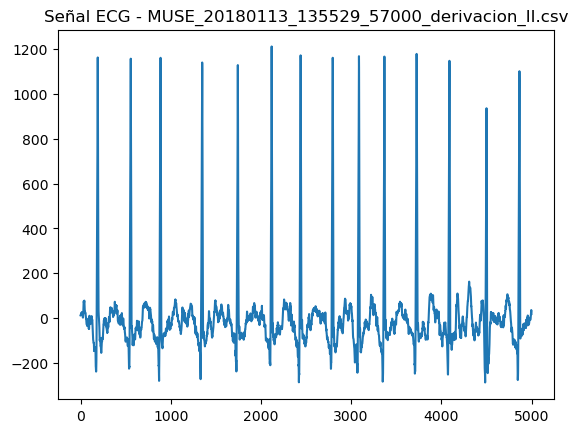

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


Información del procesamiento para MUSE_20180113_135529_57000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 556,  887, 1349, 1744, 2119, 2440, 2796, 3082, 3369, 3726, 4090,
       4501, 4866]), 'ECG_R_Peaks_Uncorrected': array([ 556,  887, 1349, 1744, 2119, 2440, 2796, 3369, 3726, 4090, 4501,
       4866]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.35916667, 0.331     , 0.462     , 0.395     , 0.375     ,
       0.321     , 0.356     , 0.286     , 0.287     , 0.357     ,
       0.364     , 0.411     , 0.365     ]), 'ECG_fixpeaks_drrs': array([ 0.003978  , -0.23049645,  1.07201309, -0.54828151, -0.16366612,
       -0.44189853,  0.28641571, -0.57283142,  0.00818331,  0.57283142,
        0.05728314,  0.38461538, -0.37643208]), 'ECG_fixpeaks_mrrs': array([-0.09441463, -0.33591731,  0.62263963,  0.23255814,  0.1

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Información de picos para MUSE_20180113_135529_57000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([  42,   99,  191,  380,  557,  887,  981, 1196, 1349, 1424, 1637,
       1744, 2011, 2119, 2331, 2440, 2714, 2796, 3087, 3369, 3560, 3726,
       3855, 3908, 3978, 4090, 4501, 4690, 4866]), 'ECG_R_Peaks_Uncorrected': array([  42,   99,  191,  380,  557,  887,  981, 1196, 1349, 1424, 1637,
       1744, 2011, 2119, 2331, 2440, 2714, 2796, 3087, 3369, 3560, 3726,
       3855, 3908, 3978, 4090, 4501, 4690, 4866]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.72285714, 0.57      , 0.92      , 1.89      , 1.77      ,
       3.3       , 0.94      , 2.15      , 1.53      , 0.75      ,
       2.13      , 1.07      , 2.67      , 1.08      , 2.12      ,
       1.09      , 2.74      , 0.82      , 2.91      , 2.82      ,
     

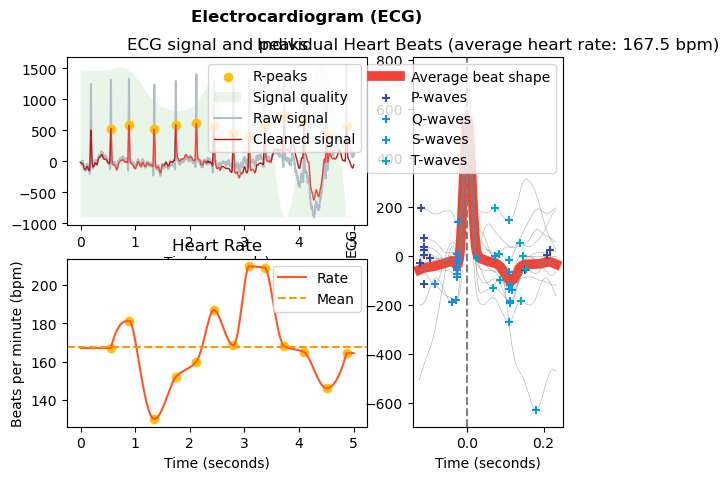

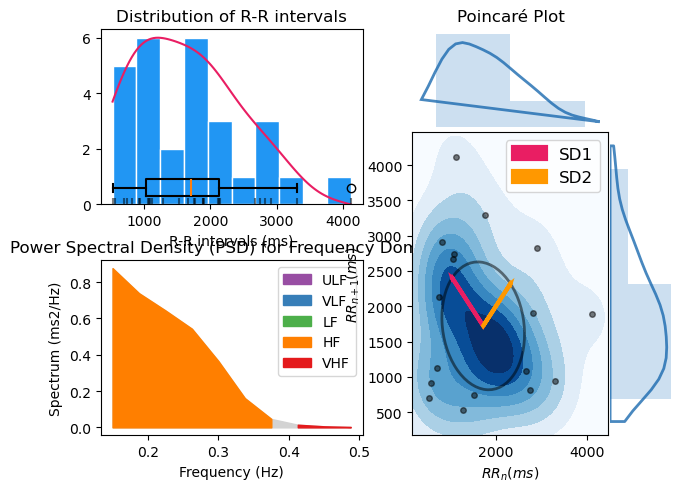

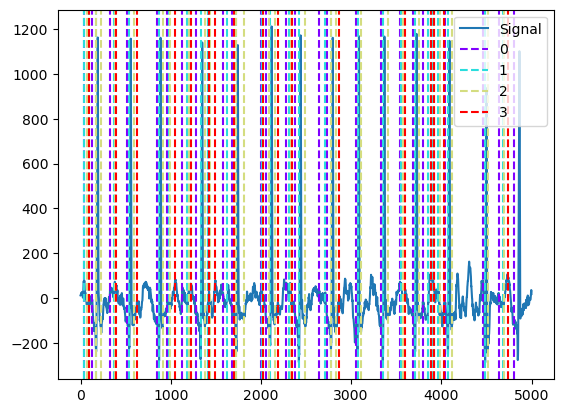

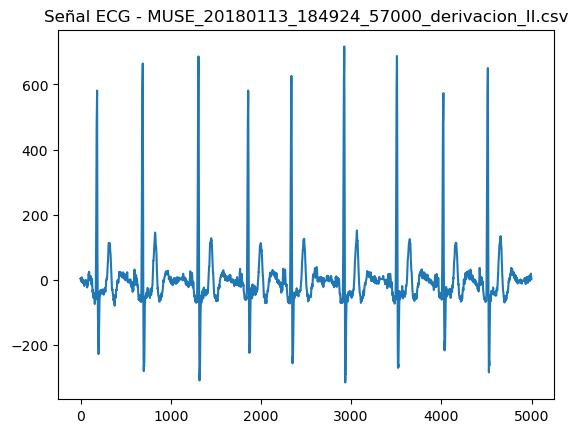

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Información del procesamiento para MUSE_20180113_184924_57000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 686, 1304, 1855, 2334, 2920, 3504, 4019, 4512]), 'ECG_R_Peaks_Uncorrected': array([ 686, 1304, 1855, 2334, 2920, 3504, 4019, 4512]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.54657143, 0.618     , 0.551     , 0.479     , 0.586     ,
       0.584     , 0.515     , 0.493     ]), 'ECG_fixpeaks_drrs': array([-0.05537221,  0.51680731, -0.48476526, -0.52094177,  0.77417735,
       -0.0144706 , -0.49923586, -0.15917665]), 'ECG_fixpeaks_mrrs': array([-0.43177129,  0.69112879,  0.02284114, -1.43972885,  0.38387857,
        0.36324786, -0.74270557, -0.82522841]), 'ECG_fixpeaks_s12': array([ 0.51680731, -0.05537221, -0.52094177, -0.48476526, -0.0144706 ,
       -0.49923586, -0.15917665, -0.49923586]), 'ECG_fixpe

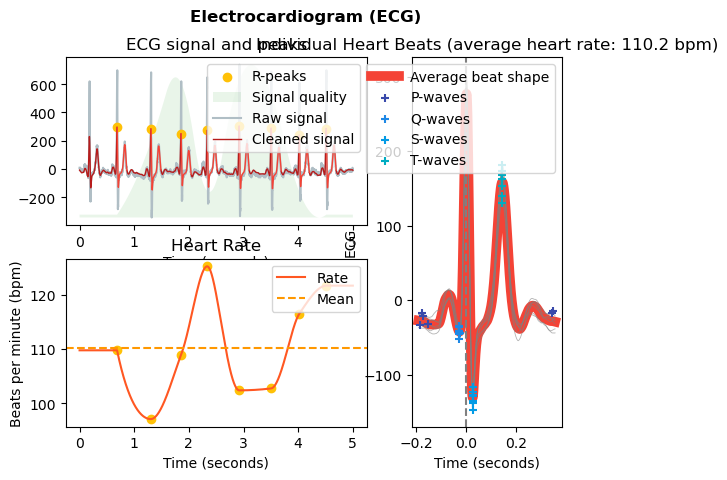

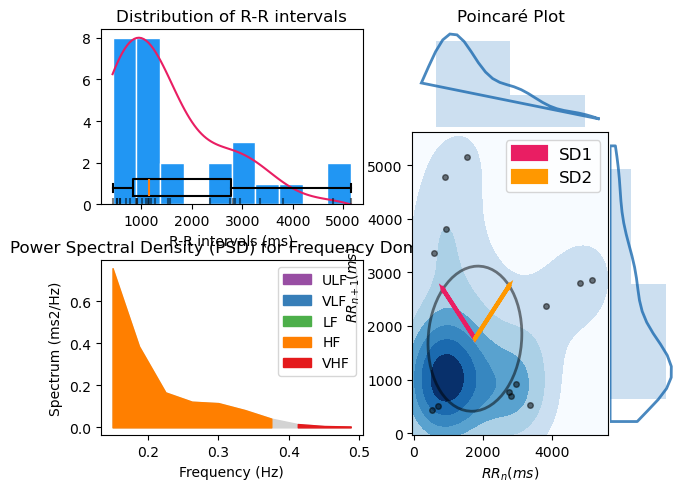

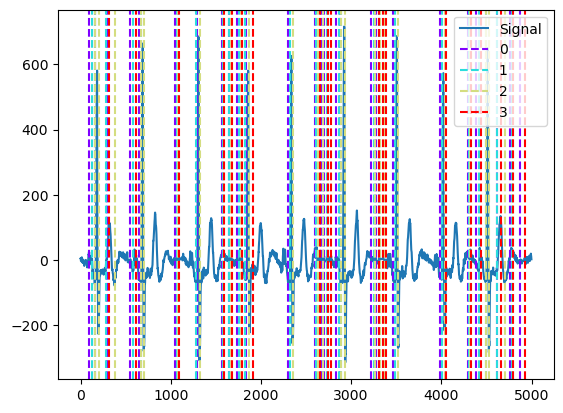

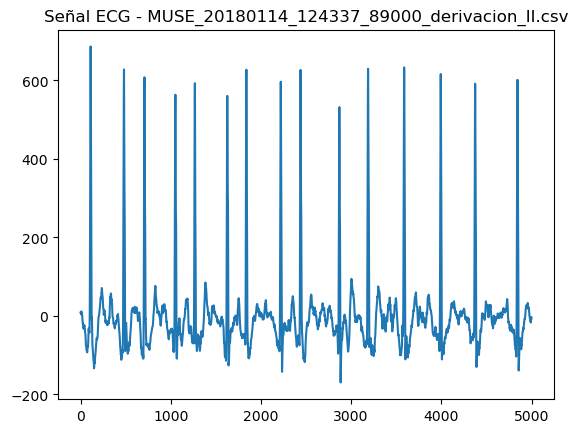

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
c:\Users\User\anaconda3\Lib\site-packages\neurokit

Información del procesamiento para MUSE_20180114_124337_89000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 482, 1052, 1627, 2220, 2869, 3188, 3588, 3994, 4375, 4844]), 'ECG_R_Peaks_Uncorrected': array([ 482, 1052, 1627, 2220, 2869, 3188, 3588, 3994, 4375, 4844]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.48466667, 0.57      , 0.575     , 0.593     , 0.649     ,
       0.319     , 0.4       , 0.406     , 0.381     , 0.469     ]), 'ECG_fixpeaks_drrs': array([-0.00889722,  0.43615299,  0.02555584,  0.09200102,  0.2862254 ,
       -1.68668541,  0.4140046 ,  0.03066701, -0.1277792 ,  0.44978278]), 'ECG_fixpeaks_mrrs': array([-0.6121323 ,  0.        ,  0.16610042,  0.37750094,  0.59993612,
       -1.09997967, -0.48087813, -0.21953132, -0.1742312 ,  0.22998519]), 'ECG_fixpeaks_s12': array([ 0.43615299,  0.0255558

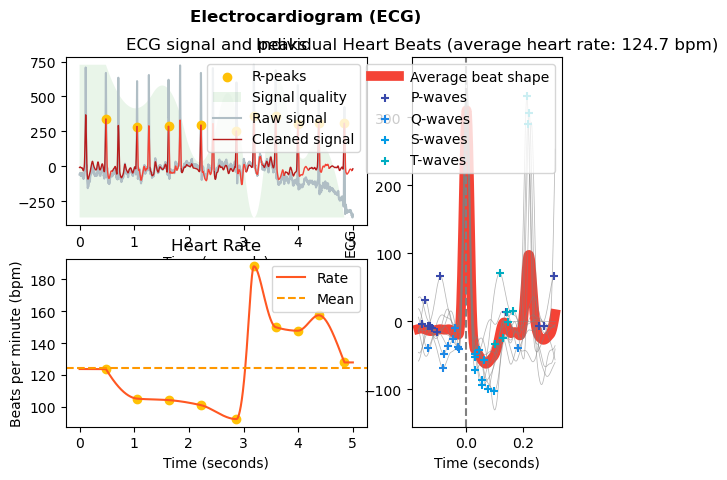

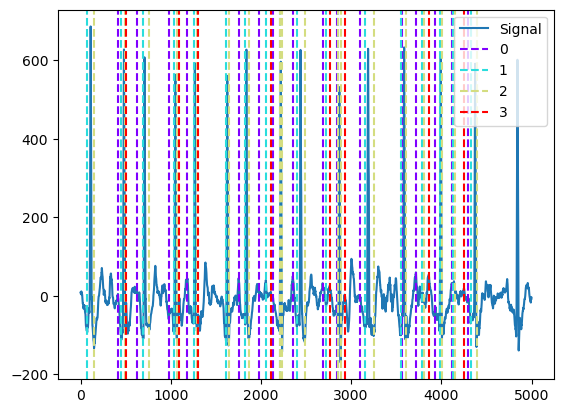

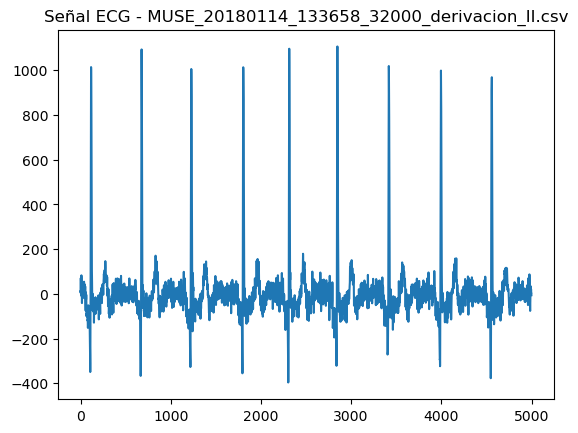

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


Información del procesamiento para MUSE_20180114_133658_32000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 679, 1230, 1807, 2328, 2850, 3420, 3998, 4560]), 'ECG_R_Peaks_Uncorrected': array([ 679, 1230, 1807, 2317, 2850, 3420, 3998, 4560]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.55442857, 0.551     , 0.577     , 0.521     , 0.522     ,
       0.57      , 0.578     , 0.562     ]), 'ECG_fixpeaks_drrs': array([ 0.01451637, -0.04601416,  0.34894072, -0.75156462,  0.0134208 ,
        0.64419824,  0.10736637, -0.21473275]), 'ECG_fixpeaks_mrrs': array([ 0.02693149, -0.10772597,  0.29512428, -1.16927566, -1.13785558,
        0.18515401,  0.2513606 , -0.1256803 ]), 'ECG_fixpeaks_s12': array([-0.04601416,  0.01451637, -0.04601416,  0.0134208 ,  0.64419824,
        0.10736637,  0.64419824,  0.10736637]), 'ECG_fixpe

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Información de picos para MUSE_20180114_133658_32000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([  59,  117,  309,  677,  832,  953, 1145, 1228, 1426, 1804, 2314,
       2570, 2792, 2848, 3186, 3278, 3418, 3467, 3529, 3667, 3729, 3858,
       3922, 3996, 4068, 4560, 4977]), 'ECG_R_Peaks_Uncorrected': array([  59,  117,  309,  677,  832,  953, 1145, 1228, 1426, 1804, 2314,
       2570, 2792, 2848, 3186, 3278, 3418, 3467, 3529, 3667, 3729, 3858,
       3922, 3996, 4068, 4560, 4977]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.89153846, 0.58      , 1.92      , 3.68      , 1.55      ,
       1.21      , 1.92      , 0.83      , 1.98      , 3.78      ,
       5.1       , 2.56      , 2.22      , 0.56      , 3.38      ,
       0.92      , 1.4       , 0.49      , 0.62      , 1.38      ,
       0.62      , 1.29      

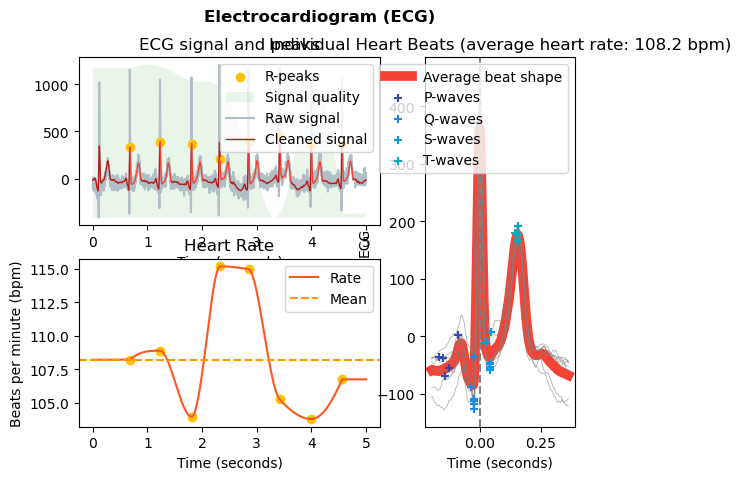

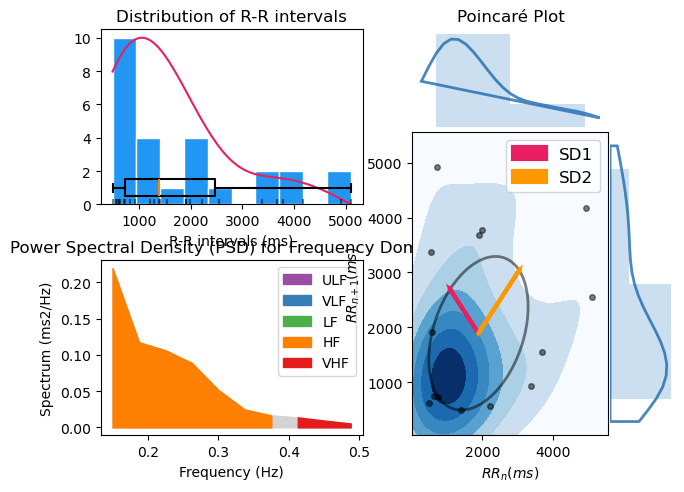

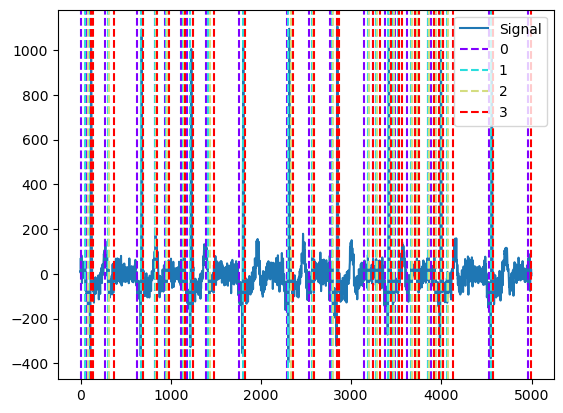

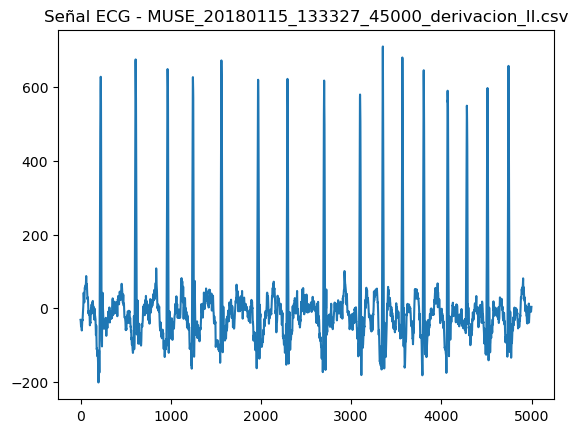

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Información del procesamiento para MUSE_20180115_133327_45000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 611,  966, 1467, 1969, 2294, 2701, 3099, 3569, 4071, 4511]), 'ECG_R_Peaks_Uncorrected': array([ 611,  966, 1563, 1969, 2294, 2701, 3099, 3569, 4071, 4511]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.43333333, 0.355     , 0.501     , 0.502     , 0.325     ,
       0.407     , 0.398     , 0.47      , 0.502     , 0.44      ]), 'ECG_fixpeaks_drrs': array([ 0.00429498, -0.45419405,  0.84654039,  0.00579822, -1.02628527,
        0.47545419, -0.052184  ,  0.41747198,  0.1855431 , -0.35948976]), 'ECG_fixpeaks_mrrs': array([ 0.0904304 , -0.71428571,  0.55517399,  0.47161172, -1.53388278,
       -0.40750916, -0.57692308,  0.10302198,  0.42582418,  0.11332418]), 'ECG_fixpeaks_s12': array([-0.45419405,  0.0042949

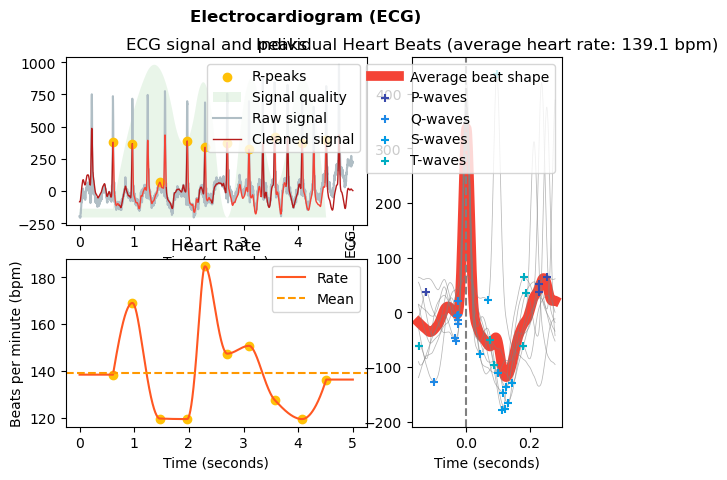

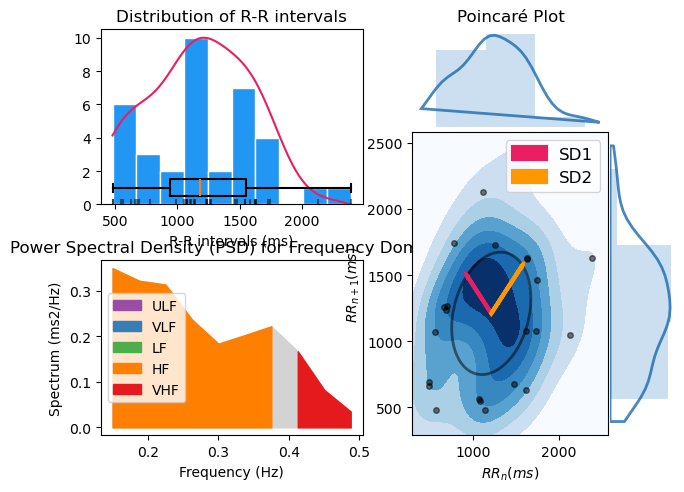

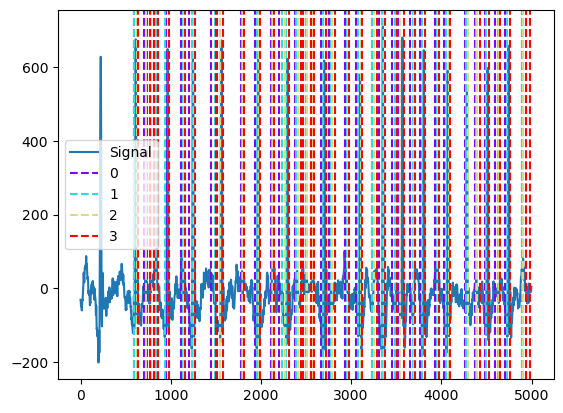

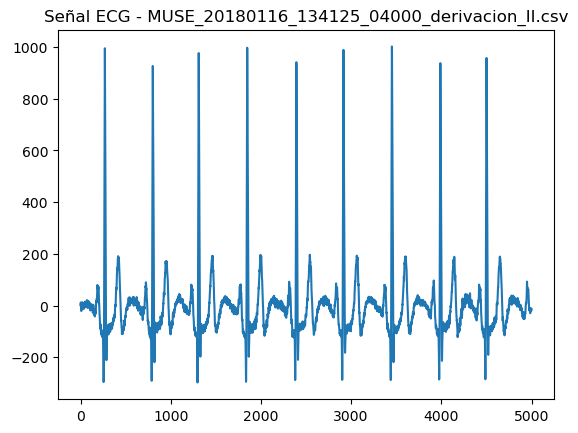

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\complexity\entropy_multiscale.py:349: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
c:\Users\User\anaconda3\Lib\site-packages\neurokit

Información del procesamiento para MUSE_20180116_134125_04000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 803, 1312, 1850, 2395, 2916, 3454, 3991, 4503]), 'ECG_R_Peaks_Uncorrected': array([ 803, 1312, 1850, 2395, 2916, 3454, 3991, 4503]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.52857143, 0.509     , 0.538     , 0.545     , 0.521     ,
       0.538     , 0.537     , 0.512     ]), 'ECG_fixpeaks_drrs': array([-0.04946273, -0.40892035,  0.60591847,  0.14625618, -0.50144977,
        0.35519359, -0.02089374, -0.52234351]), 'ECG_fixpeaks_mrrs': array([-0.14382218, -0.8542166 ,  0.07953803,  0.1863151 , -0.35955546,
        0.07953803,  0.        , -0.77794727]), 'ECG_fixpeaks_s12': array([-0.40892035, -0.04946273,  0.14625618,  0.60591847,  0.14625618,
       -0.02089374, -0.52234351, -0.02089374]), 'ECG_fixpe

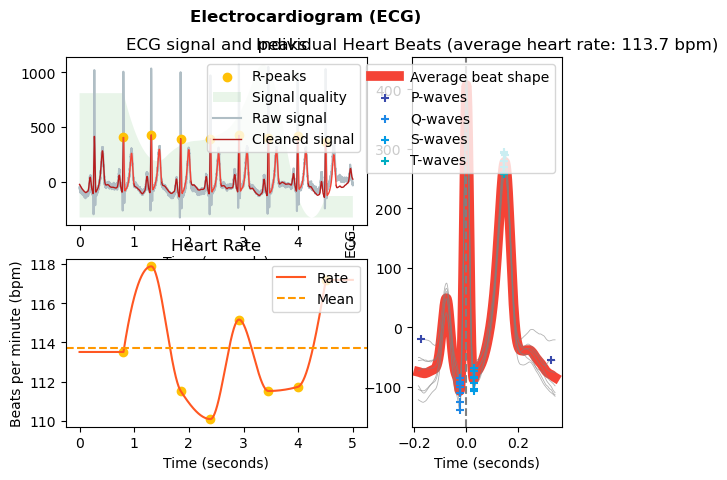

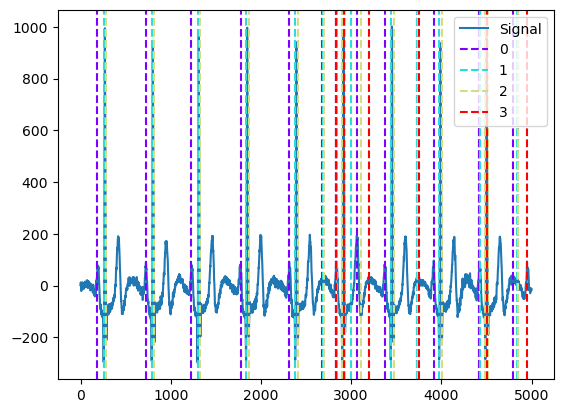

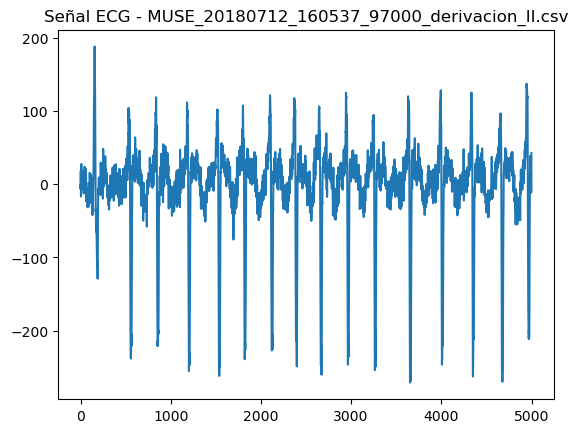

c:\Users\User\anaconda3\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(
c:\Users\User\anaconda3\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Información del procesamiento para MUSE_20180712_160537_97000_derivacion_II.csv:
{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 533, 1178, 1511, 2095, 2640, 2942, 3631, 3986, 4329, 4649]), 'ECG_R_Peaks_Uncorrected': array([ 533, 1178, 1511, 2095, 2640, 2942, 3631, 3986, 4329, 4649]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([0.45733333, 0.645     , 0.333     , 0.584     , 0.545     ,
       0.302     , 0.689     , 0.355     , 0.343     , 0.32      ]), 'ECG_fixpeaks_drrs': array([-0.02175698,  0.26757919, -0.44485635,  0.35788123, -0.05560704,
       -0.34647466,  0.55179297, -0.47622442, -0.01710986, -0.0327939 ]), 'ECG_fixpeaks_mrrs': array([-0.26857974,  0.30636473, -1.0304067 ,  0.38806199,  0.42533636,
       -0.63825985,  1.02325819,  0.01838188, -0.07352753, -0.17769154]), 'ECG_fixpeaks_s12': array([ 0.26757919, -0.0217569

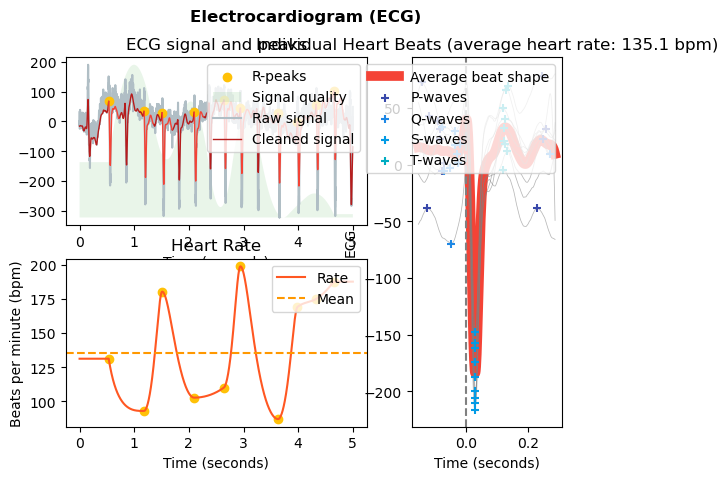

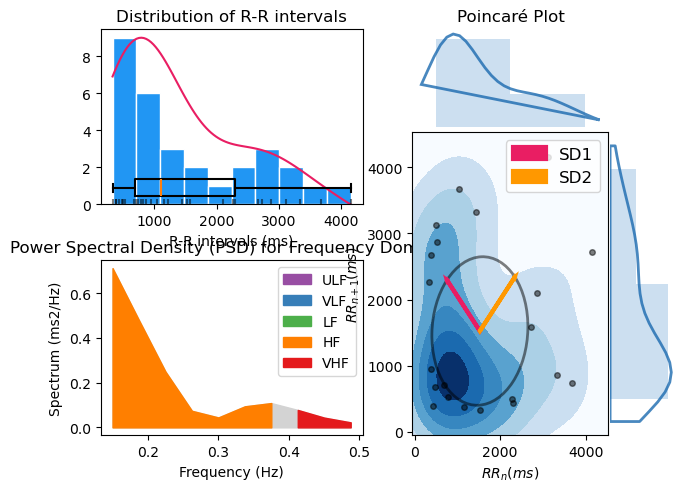

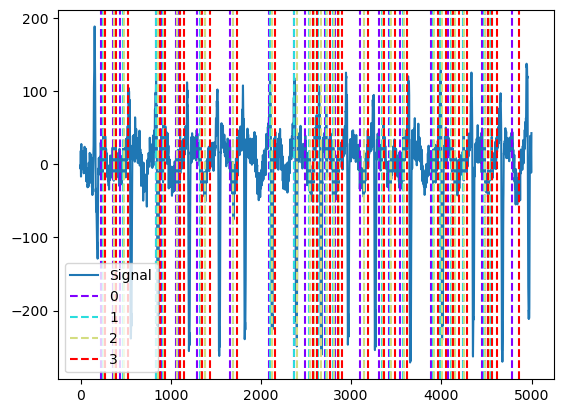

In [14]:
import os
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

# Ruta a la carpeta que contiene los archivos CSV
carpeta = "Señales_Seleccionadas"

# Obtener la lista de archivos en la carpeta
archivos = [f for f in os.listdir(carpeta) if f.endswith('.csv')]

# Recorrer cada archivo y procesar la señal
for archivo in archivos:
    try:
        # Leer el archivo CSV
        ruta_archivo = os.path.join(carpeta, archivo)
        ecg_signal = pd.read_csv(ruta_archivo)
        ecg_signal = ecg_signal.values.flatten()
        
        # Limpiar la señal ECG
        ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=100)
        
        # Visualizar la señal
        plt.figure()
        plt.plot(ecg_cleaned)
        plt.title(f"Señal ECG - {archivo}")
        plt.show()
        
        # Procesar la señal ECG
        ecg_signals, info = nk.ecg_process(ecg_signal)
        
        # Visualizar el procesamiento
        nk.ecg_plot(ecg_signals)
        
        print(f"Información del procesamiento para {archivo}:")
        print(info)
        
        # Detección de picos R y cálculo de HRV
        peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=100, correct_artifacts=True)
        
        try:
            # Calcular HRV
            hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
        except Exception as e:
            print(f"No se pudo calcular HRV para {archivo}: {e}")
            hrv_indices = None  # Si no se puede calcular, asignar None
        
        print(f"Información de picos para {archivo}:")
        print(info)
        
        # Delineación de la señal ECG
        _, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=100)
        signals, waves = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=100)
        nk.events_plot([waves["ECG_P_Peaks"], waves["ECG_Q_Peaks"], waves["ECG_S_Peaks"], waves["ECG_T_Peaks"]], ecg_cleaned)

    except ValueError as ve:
        print(f"Error en {archivo}: {ve}")
    except nk.exceptions.NeuroKitError as nke:
        print(f"Error de NeuroKit en {archivo}: {nke}")
    except Exception as e:
        print(f"Ocurrió un error procesando {archivo}: {e}")


### 5. Con las características que extrae el neurokit y las discutidas en el punto 1 generar un conjunto de características para el presente trabajo. Incluir la característica de frecuencia de potencia máxima del Proyecto 3 (10%). No incluir más de 15 características ni menos de 5, justificar la selección (5%).

NeuroKit2 extrae diversas características de la señal ECG al procesarla. Algunas de las características principales que puedes obtener de una señal ECG procesada con NeuroKit incluyen información sobre los picos de la señal, los intervalos RR, y varios índices de variabilidad de la frecuencia cardíaca (HRV), entre otros. Esas caracteristicas las podemos conocer con la siguiente linea de código:

In [19]:
print(info.keys())  # Muestra las claves de información extraída
# info es un diccionario con todas las caracteristicas extraidas, para verlas menor usamos lo sgte:
for i in list(info.keys()):
    print(i)

dict_keys(['method_peaks', 'method_fixpeaks', 'ECG_R_Peaks', 'ECG_R_Peaks_Uncorrected', 'ECG_fixpeaks_ectopic', 'ECG_fixpeaks_missed', 'ECG_fixpeaks_extra', 'ECG_fixpeaks_longshort', 'ECG_fixpeaks_method', 'ECG_fixpeaks_rr', 'ECG_fixpeaks_drrs', 'ECG_fixpeaks_mrrs', 'ECG_fixpeaks_s12', 'ECG_fixpeaks_s22', 'ECG_fixpeaks_c1', 'ECG_fixpeaks_c2', 'sampling_rate'])
method_peaks
method_fixpeaks
ECG_R_Peaks
ECG_R_Peaks_Uncorrected
ECG_fixpeaks_ectopic
ECG_fixpeaks_missed
ECG_fixpeaks_extra
ECG_fixpeaks_longshort
ECG_fixpeaks_method
ECG_fixpeaks_rr
ECG_fixpeaks_drrs
ECG_fixpeaks_mrrs
ECG_fixpeaks_s12
ECG_fixpeaks_s22
ECG_fixpeaks_c1
ECG_fixpeaks_c2
sampling_rate


#### 6. Crear una rutina que aplique sobre todos los archivos de la base de datos la rutina 5 y almacene los resultados en un dataframe:

Todos los puntos realizados a continuación son con las características definidas

### 7. Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red (10%) y las matrices de confusión obtenidas (10%), de una red neuronal que permita la clasificación de las dos patologías cardiacas.

### 8. Consultar cómo funciona, realizar y discutir un ejemplo con los datos, del algoritmo de K means (10%) y máquinas de soporte vectorial

### 9. Hacer un informe con todos los puntos anteriores (10%). En el informe incluir: Consultar por lo menos tres equipos comerciales traen ya incorporados algoritmos de ayuda diagnóstica a partir de señales EKG (5%) y discutir brevemente las funcionalidades desde la teoría vista en el curso (5%)

# CONSULTA 